# Quest 03: AARRR 분석/통계분석

데이터사이언티스트의 역할로 비즈니스 지표를 정의하고 분석보고서를 내는 프로젝트

AARRR을 포함한 비즈니스 지표는 회사의 상황과 의사결정자의 판단에 따라 적절한 지표를 선택해주는 것이 중요 / AARRR 지표에 더 좋은 옵션 고민해서 결과물 산출

### 데이터설명

- 데이터 출처: https://archive.ics.uci.edu/dataset/502/online+retail+ii
- 컬럼 설명
    - `InvoiceNo`: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
    - `StockCode`: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
    - `Description`: Product (item) name. Nominal.
    - `Quantity`: The quantities of each product (item) per transaction. Numeric.
    - `InvoiceDate`: Invice date and time. Numeric. The day and time when a transaction was generated.
    - `UnitPrice`: Unit price. Numeric. Product price per unit in sterling (Â£).
    - `CustomerID`: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
    - `Country`: Country name. Nominal. The name of the country where a customer resides.

### **문제 1: 데이터 로드 및 탐색**

- **데이터의 첫 5개 행을 출력**하여 데이터 형식을 확인하세요.
- **데이터프레임의 컬럼 정보**와 **결측치 여부**를 확인하고 전처리 전략을 고민해보세요.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
import os

!pip install openpyxl
#github_url = 'https://archive.ics.uci.edu/dataset/502/online+retail+ii'
# Download the dataset : online_retail_II.xlsx
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/00352/online_retail_II.xlsx


#!wget github_url
files = os.listdir()
print(files)
excel_file = pd.ExcelFile('online_retail_II.xlsx')
print(excel_file.sheet_names)
#chunk_size = 100000
#sheet_200910 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2009-2010', chunksize=chunk_size)
#sheet_201011 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011', chunksize=chunk_size)
sheet_200910 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2009-2010')
sheet_201011 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011')
print(f"Year 2009-2010 size : {len(sheet_200910)}") #525461
print(f"Year 2010-2011 size : {len(sheet_201011)}") #541910

#retail_data = pd.read_excel('online_retail_II.xlsx') #525461 : read the first sheet in case of multiple sheets
retail_data = pd.concat([sheet_200910, sheet_201011], ignore_index=True)
print(f"total_data size : {len(retail_data)}")

['Stats_Quest3_HyunbokCho_results.ipynb', 'online_retail_II.xlsx', 'Stats_Quest3_HyunbokCho_results_bk.ipynb', 'online+retail+ii.zip', 'Stats_Quest3_HyunbokCho_results_2nd.ipynb']
['Year 2009-2010', 'Year 2010-2011']
Year 2009-2010 size : 525461
Year 2010-2011 size : 541910
total_data size : 1067371


In [2]:
retail_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [4]:
retail_data.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,1.067371e+06,1067371,1.067371e+06,824364.000000
mean,9.938898e+00,2011-01-02 21:13:55.394028544,4.649388e+00,15324.638504
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000
25%,1.000000e+00,2010-07-09 09:46:00,1.250000e+00,13975.000000
50%,3.000000e+00,2010-12-07 15:28:00,2.100000e+00,15255.000000
75%,1.000000e+01,2011-07-22 10:23:00,4.150000e+00,16797.000000
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000
std,1.727058e+02,NaN,1.235531e+02,1697.464450


In [5]:
#check out missing values
missing_values = retail_data.isnull().sum()
missing_values[missing_values > 0]
# Drop missing values
retail_data.dropna(inplace=True)
# Drop duplicates
retail_data.drop_duplicates(inplace=True)
# Check for duplicates
duplicates = retail_data.duplicated().sum()
print(f"Duplicates: {duplicates}")
# Check for missing values
missing_values = retail_data.isnull().sum()
print(f"Missing values: {missing_values[missing_values > 0]}")

Duplicates: 0
Missing values: Series([], dtype: int64)


### **문제 2: 데이터 전처리**

- **`InvoiceDate`** 컬럼을 날짜 형식으로 변환하고, **`Customer ID`**에 결측치가 있는 행을 제거하세요.
- **`Customer ID`**를 정수형으로 변환한 후, **`InvoiceDate`**를 기준으로 데이터를 정렬하세요.
- 금액을 나타내는 새로운 컬럼 **`Total`** 을 생성하세요 (`Quantity`와 `Price`를 곱한 값).

In [6]:
# Typecasing 'InvoiceDate' to datetime
retail_data['InvoiceDate'] = pd.to_datetime(retail_data['InvoiceDate'], format='%Y-%m-%d %H:%M:%S')
# update 'Customer ID' to 'CustomerID'
retail_data.rename(columns={'Customer ID': 'CustomerID'}, inplace=True)
# Check the data types
print(f"Updated 'InvoiceDate type' and 'CustomerID' column name : \n {retail_data.dtypes}\n")

# Check out any missing values at 'CustomerID'
missing_values = retail_data.isnull().sum()
print(f"Missing values in 'CustomerID': {missing_values['CustomerID']}\n")
# Remove rows with missing 'CustomerID'
retail_data = retail_data[~retail_data['CustomerID'].isnull()]
# Typecasting 'CustomerID' to int
retail_data['CustomerID'] = retail_data['CustomerID'].astype(int)
# Sort the data by 'InvoiceDate'
retail_data.sort_values(by='InvoiceDate', inplace=True)
# Add a new column 'Total' to calculate the total price of each order by multiplying 'Quantity' and 'Price'
retail_data['Total'] = retail_data['Quantity'] * retail_data['Price']   
# Check the data types
print(f"Updated 'CustomerID type' and new column 'Total' : \n {retail_data.dtypes}\n")

# Check for negative quantities 
negative_quantities = retail_data[retail_data['Quantity'] < 0]
print(f"Negative quantities: {len(negative_quantities)}")
# Check for negative prices
negative_prices = retail_data[retail_data['Price'] < 0]
print(f"Negative prices: {len(negative_prices)}")

#check out any refunded orders
refunded_orders = retail_data[retail_data['Quantity'] < 0]
print(f"Refunded orders: {len(refunded_orders)}")

# Check for any negative values in the 'Quantity' and 'Price' columns
negative_values = retail_data[(retail_data['Quantity'] < 0) | (retail_data['Price'] < 0)]
print(f"Negative values: {len(negative_values)}")

Updated 'InvoiceDate type' and 'CustomerID' column name : 
 Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
CustomerID            float64
Country                object
dtype: object

Missing values in 'CustomerID': 0

Updated 'CustomerID type' and new column 'Total' : 
 Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
CustomerID              int64
Country                object
Total                 float64
dtype: object

Negative quantities: 18390
Negative prices: 0
Refunded orders: 18390
Negative values: 18390


### **문제 3: 나라별 구매 인원 시각화**

- **`Country`** 컬럼을 기준으로 **`Customer ID`**의 유니크한 값을 계산하여 나라별 구매 고객 수를 시각화 해보세요

Unique customers per country: 
Country
United Kingdom          5410
Germany                  107
France                    95
Spain                     41
Belgium                   29
Portugal                  24
Netherlands               23
Switzerland               22
Sweden                    19
Italy                     17
Finland                   15
Australia                 15
Channel Islands           14
Norway                    13
Austria                   13
Denmark                   12
Cyprus                    11
Japan                     10
USA                        9
Unspecified                7
Poland                     6
Greece                     5
EIRE                       5
Canada                     5
Israel                     4
United Arab Emirates       4
Malta                      2
Bahrain                    2
Brazil                     2
RSA                        2
Korea                      2
Czech Republic             1
Iceland                    1
Leba

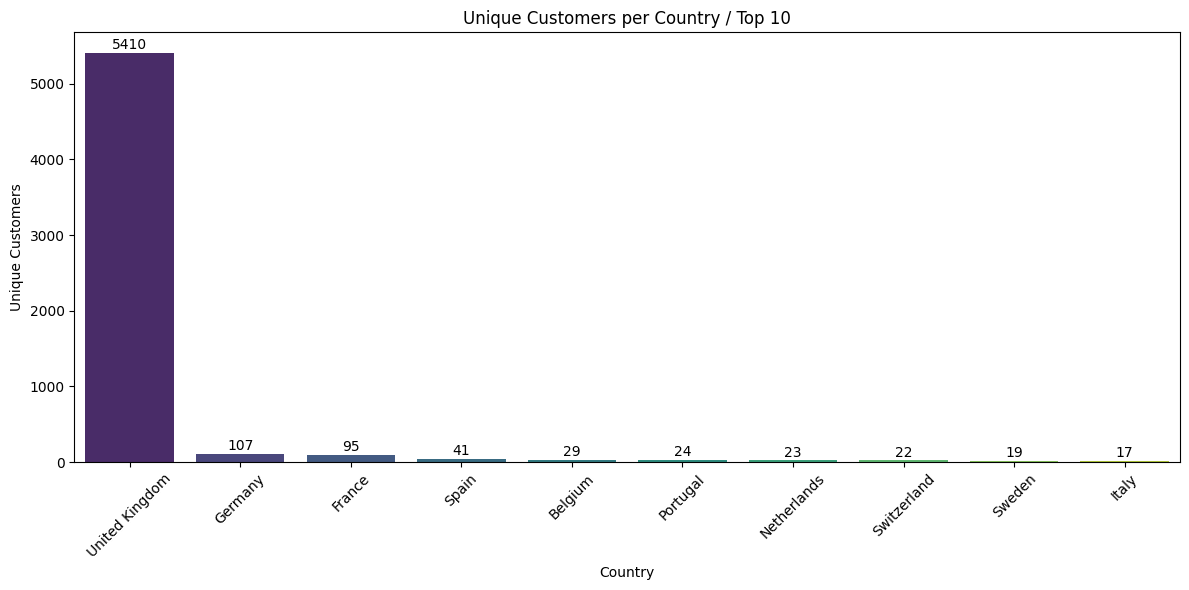

In [7]:
unique_customers = retail_data.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)     
print(f"Unique customers per country: \n{unique_customers}\n")
plt.figure(figsize=(12, 6))
sns.barplot(x=unique_customers.index[:10], y=unique_customers.values[:10], palette='viridis')
for i, v in enumerate(unique_customers.values[:10]):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=10)
plt.xlabel('Country')
plt.ylabel('Unique Customers')
plt.title('Unique Customers per Country / Top 10')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()


### **문제 4: Acquisition (고객 유입 분석)**

- 신규 고객 분석을 위해 고객의 **첫 구매 시점**을 기준으로 월별 신규 유입 고객 수를 계산하세요.
- 각 고객의 첫 구매 날짜를 추출하고, **월별 신규 고객 수**를 시각화하세요.

In [8]:
print(retail_data.head)

<bound method NDFrame.head of         Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1067357  581587     22555            PLASTERS IN TIN STRONGMAN        12   
1067356  581587     22556       PLASTERS IN TIN CIRCUS PARADE         12   
1067355  581587     22631             CIRCUS PARADE LUNCH BOX         12   
1067361  581587     22730           ALARM CLOCK BAKELIKE IVORY         4   
1067370  581587      POST                              POSTAGE         1   

                InvoiceDate  Price  CustomerID         Co

In [9]:
retail_data.describe()

,Quantity,InvoiceDate,Price,CustomerID,Total
count,797885.000000,797885,797885.000000,797885.000000,797885.000000
mean,12.602980,2011-01-02 13:17:34.141160704,3.702732,15313.062777,20.416465
min,-80995.000000,2009-12-01 07:45:00,0.000000,12346.000000,-168469.600000
25%,2.000000,2010-07-02 09:47:00,1.250000,13964.000000,4.350000
50%,5.000000,2010-12-02 12:33:00,1.950000,15228.000000,11.700000
75%,12.000000,2011-07-31 15:50:00,3.750000,16788.000000,19.500000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,168469.600000
std,191.670371,NaN,71.392549,1696.466663,313.518824


In [10]:
retail_data['InvoiceDate'].head

<bound method NDFrame.head of 0         2009-12-01 07:45:00
1         2009-12-01 07:45:00
2         2009-12-01 07:45:00
3         2009-12-01 07:45:00
4         2009-12-01 07:45:00
                  ...        
1067357   2011-12-09 12:50:00
1067356   2011-12-09 12:50:00
1067355   2011-12-09 12:50:00
1067361   2011-12-09 12:50:00
1067370   2011-12-09 12:50:00
Name: InvoiceDate, Length: 797885, dtype: datetime64[ns]>

In [11]:
# to check out new customers, calcurate them by their first purchase date per month
retail_data['InvoiceMonth'] = retail_data['InvoiceDate'].dt.to_period('M')
retail_data['InvoiceMonth'].head

<bound method NDFrame.head of 0          2009-12
1          2009-12
2          2009-12
3          2009-12
4          2009-12
            ...   
1067357    2011-12
1067356    2011-12
1067355    2011-12
1067361    2011-12
1067370    2011-12
Name: InvoiceMonth, Length: 797885, dtype: period[M]>

In [12]:
# Group by 'InvoiceMonth' and 'CustomerID' to get the first purchase date
first_purchase = retail_data.groupby(['InvoiceMonth', 'CustomerID']).agg({'InvoiceDate': 'min'}).reset_index()
# Rename the columns
first_purchase.rename(columns={'InvoiceDate': 'FirstPurchaseDate'}, inplace=True)
print(first_purchase.head())

  InvoiceMonth  CustomerID   FirstPurchaseDate
0      2009-12       12346 2009-12-14 08:34:00
1      2009-12       12349 2009-12-04 12:49:00
2      2009-12       12358 2009-12-08 07:59:00
3      2009-12       12359 2009-12-05 13:32:00
4      2009-12       12362 2009-12-01 10:10:00


In [13]:
print((pd.merge(retail_data, first_purchase, on=['InvoiceMonth', 'CustomerID'], how='left')).head())
# Merge the first purchase data with the original data
retail_data = pd.merge(retail_data, first_purchase, on=['InvoiceMonth', 'CustomerID'], how='left')

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  CustomerID         Country  Total InvoiceMonth  \
0 2009-12-01 07:45:00   6.95       13085  United Kingdom   83.4      2009-12   
1 2009-12-01 07:45:00   6.75       13085  United Kingdom   81.0      2009-12   
2 2009-12-01 07:45:00   6.75       13085  United Kingdom   81.0      2009-12   
3 2009-12-01 07:45:00   2.10       13085  United Kingdom  100.8      2009-12   
4 2009-12-01 07:45:00   1.25       13085  United Kingdom   30.0      2009-12   

    FirstPurchaseDate  
0 2009-12-01 07:45:00  
1 2009-12-01 07:45:00  
2 2009-12-01 07:45:00  
3 

In [14]:
retail_data[retail_data['InvoiceDate'] == retail_data['FirstPurchaseDate']].head()
# Calculate the number of new customers per month
new_customers = retail_data[retail_data['InvoiceDate'] == retail_data['FirstPurchaseDate']]


In [15]:
new_customers.info()


<class 'pandas.core.frame.DataFrame'>
Index: 563504 entries, 0 to 797884
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Invoice            563504 non-null  object        
 1   StockCode          563504 non-null  object        
 2   Description        563504 non-null  object        
 3   Quantity           563504 non-null  int64         
 4   InvoiceDate        563504 non-null  datetime64[ns]
 5   Price              563504 non-null  float64       
 6   CustomerID         563504 non-null  int64         
 7   Country            563504 non-null  object        
 8   Total              563504 non-null  float64       
 9   InvoiceMonth       563504 non-null  period[M]     
 10  FirstPurchaseDate  563504 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(4), period[M](1)
memory usage: 51.6+ MB


In [16]:
# Convert 'InvoiceMonth' to datetime if it's not already in datetime format
if not pd.api.types.is_datetime64_any_dtype(new_customers['InvoiceMonth']):
	new_customers['InvoiceMonth'] = new_customers['InvoiceMonth'].dt.to_timestamp()
print(new_customers.info())

<class 'pandas.core.frame.DataFrame'>
Index: 563504 entries, 0 to 797884
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Invoice            563504 non-null  object        
 1   StockCode          563504 non-null  object        
 2   Description        563504 non-null  object        
 3   Quantity           563504 non-null  int64         
 4   InvoiceDate        563504 non-null  datetime64[ns]
 5   Price              563504 non-null  float64       
 6   CustomerID         563504 non-null  int64         
 7   Country            563504 non-null  object        
 8   Total              563504 non-null  float64       
 9   InvoiceMonth       563504 non-null  datetime64[ns]
 10  FirstPurchaseDate  563504 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(2), int64(2), object(4)
memory usage: 51.6+ MB
None


   InvoiceMonth  CustomerID
0    2009-12-01        1045
1    2010-01-01         786
2    2010-02-01         807
3    2010-03-01        1111
4    2010-04-01         998
5    2010-05-01        1062
6    2010-06-01        1095
7    2010-07-01         988
8    2010-08-01         964
9    2010-09-01        1202
10   2010-10-01        1577
11   2010-11-01        1683
12   2010-12-01         948
13   2011-01-01         783
14   2011-02-01         798
15   2011-03-01        1020
16   2011-04-01         899
17   2011-05-01        1079
18   2011-06-01        1051
19   2011-07-01         993
20   2011-08-01         980
21   2011-09-01        1302
22   2011-10-01        1425
23   2011-11-01        1711
24   2011-12-01         686
New customers count: 
  InvoiceMonth  NewCustomers
0   2009-12-01          1045
1   2010-01-01           786
2   2010-02-01           807
3   2010-03-01          1111
4   2010-04-01           998



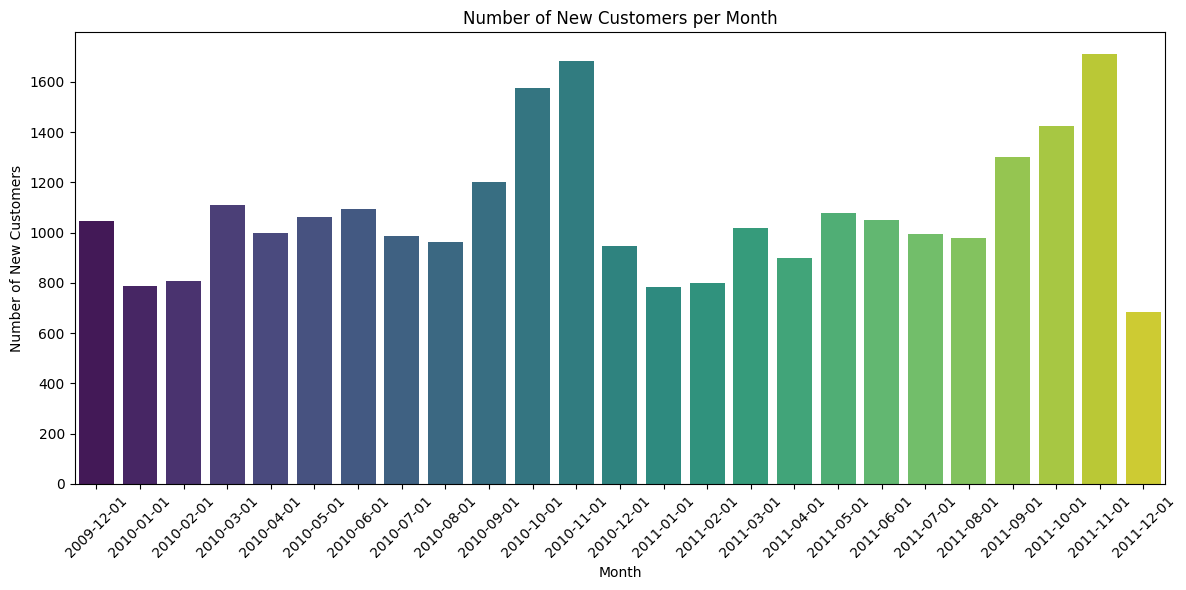

In [17]:
print(new_customers.groupby('InvoiceMonth')['CustomerID'].nunique().reset_index())
# Group by 'InvoiceMonth' to get the number of new customers
new_customers_count = new_customers.groupby('InvoiceMonth')['CustomerID'].nunique().reset_index().sort_values(by='InvoiceMonth')
# Rename the columns
new_customers_count.rename(columns={'CustomerID': 'NewCustomers'}, inplace=True)
print(f"New customers count: \n{new_customers_count.head()}\n")
# Plot the number of new customers per month
plt.figure(figsize=(12, 6))
sns.barplot(x='InvoiceMonth', y='NewCustomers', data=new_customers_count, palette='viridis')
plt.title('Number of New Customers per Month')
plt.xlabel('Month')
plt.ylabel('Number of New Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()  

### **문제 5: Activation (고객 활성화 분석)**

- 모든 고객 중 첫 구매 이후 **총 구매 금액이 특정 기준 금액 (£50)** 이상인 고객을 활성화된 고객으로 정의합니다.
- 전체 고객 수와 활성화된 고객 수를 비교하여 **활성화율**을 도출하세요.

In [18]:
# get a group of customers who purchased more than 50 dollars since their first purchase
# Group by 'CustomerID' to get the total amount spent by each customer
total_spent = retail_data.groupby('CustomerID')['Total'].sum().reset_index()
# Rename the columns
total_spent.rename(columns={'Total': 'TotalSpent'}, inplace=True)
activated = total_spent[total_spent['TotalSpent'] > 50]
print(f"Total spent by customers: \n{total_spent.head()}\n")
activated_pct = activated['CustomerID'].nunique()/total_spent['CustomerID'].nunique()
print(f"Percentage of activated customers: {activated_pct:.2%}")

Total spent by customers: 
   CustomerID  TotalSpent
0       12346      -51.74
1       12347     4921.53
2       12348     2019.40
3       12349     4404.54
4       12350      334.40

Percentage of activated customers: 97.17%


In [19]:
print(f"Number of total customers: {retail_data['CustomerID'].nunique()}")
print(f"Number of activated customers: {activated['CustomerID'].nunique()}")

Number of total customers: 5942
Number of activated customers: 5774


### **문제 6: Retention:코호트 분석(고객)**

- 분기별 활성 사용자(MAU)를 분석하여 고객 유지 현황을 파악하세요.
- 분기별 활성 고객 수를 계산하고, 이를 시각화하여 **고객 유지 트렌드**를 분석하세요.

MAR per quarter: 
  InvoiceQuarter  UniqueCustomers
0     2009-10-01             1045
1     2010-01-01             1866
2     2010-04-01             2112
3     2010-07-01             2099
4     2010-10-01             2729



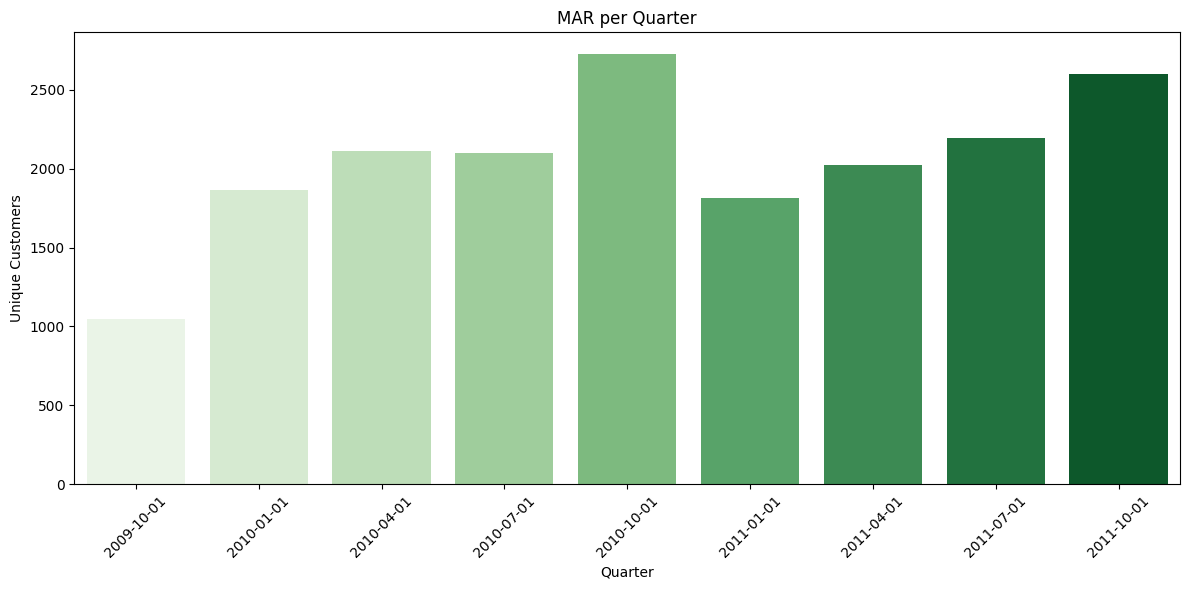

In [ ]:
# check out MAR per quarter
retail_data['InvoiceQuarter'] = retail_data['InvoiceDate'].dt.to_period('Q')
# Group by 'InvoiceQuarter' to get the number of unique customers
mar_per_quarter = retail_data.groupby('InvoiceQuarter')['CustomerID'].nunique().reset_index()
# Rename the columns
mar_per_quarter.rename(columns={'CustomerID': 'UniqueCustomers'}, inplace=True)
# Convert 'InvoiceQuarter' to datetime using the start_time attribute
mar_per_quarter['InvoiceQuarter'] = mar_per_quarter['InvoiceQuarter'].dt.start_time
print(f"MAR per quarter: \n{mar_per_quarter.head()}\n")

#히트맵 코드
heatmap = sns.heatmap(
    data=mar_per_quarter, 
    annot=True,                # 셀 내부에 값 표시
    fmt='.2f',                 # 텍스트 형식 (소수점 2자리)
    cmap='Greens',             # 색상 팔레트
    cbar_kws={'label': 'Retention Rate, %'},  # 컬러바 제
    linewidths=0.5,            # 셀 간격
    linecolor='gray',          # 셀 경계 색상
    vmin=0, vmax=100           # Retention Rate의 범위 설정
)